# Listing 5.8 Visualizing multiclass data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))

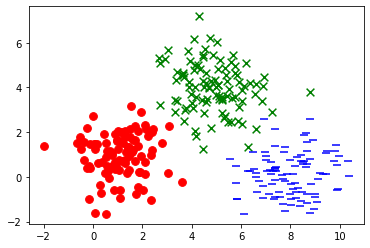

In [3]:
plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()

# Listing 5.9 Setting up training and test data for multiclass classification

In [4]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))
xs = np.vstack((xs_label0, xs_label1, xs_label2))
labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))

In [5]:
arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

In [6]:
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))

In [7]:
test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10)

In [8]:
train_size, num_features = xs.shape

In [9]:
x1_label0

array([[ 1.10694542],
       [ 3.04126302],
       [ 1.33649144],
       [ 1.38067276],
       [-0.12796508],
       [ 0.01164361],
       [ 0.08499613],
       [ 2.36799962],
       [ 0.54347085],
       [ 1.55562992],
       [ 1.259843  ],
       [ 0.73133394],
       [ 0.93564825],
       [ 0.50807956],
       [ 1.94290637],
       [ 0.70240092],
       [ 1.93526284],
       [ 0.98752186],
       [ 2.21877222],
       [ 3.59186058],
       [-0.50171563],
       [ 2.11664589],
       [ 0.61423806],
       [-0.37186161],
       [ 0.70201118],
       [ 2.37456186],
       [ 1.28820597],
       [ 2.12473982],
       [ 0.02760874],
       [ 1.21186578],
       [-0.22988295],
       [ 2.04229627],
       [ 1.47701802],
       [ 0.77275406],
       [-0.17118304],
       [ 1.62952789],
       [ 1.8950595 ],
       [ 2.80236539],
       [-0.52301622],
       [ 1.04697592],
       [ 3.09579547],
       [ 1.08729359],
       [ 1.01662389],
       [ 0.0699647 ],
       [ 0.78236986],
       [ 2

In [10]:
np.hstack(x1_label0)

array([ 1.10694542,  3.04126302,  1.33649144,  1.38067276, -0.12796508,
        0.01164361,  0.08499613,  2.36799962,  0.54347085,  1.55562992,
        1.259843  ,  0.73133394,  0.93564825,  0.50807956,  1.94290637,
        0.70240092,  1.93526284,  0.98752186,  2.21877222,  3.59186058,
       -0.50171563,  2.11664589,  0.61423806, -0.37186161,  0.70201118,
        2.37456186,  1.28820597,  2.12473982,  0.02760874,  1.21186578,
       -0.22988295,  2.04229627,  1.47701802,  0.77275406, -0.17118304,
        1.62952789,  1.8950595 ,  2.80236539, -0.52301622,  1.04697592,
        3.09579547,  1.08729359,  1.01662389,  0.0699647 ,  0.78236986,
        2.4450778 ,  0.97667777,  1.55782332,  1.21136535,  0.55235079,
        1.57189465,  2.129561  , -0.36948206,  0.15862476,  1.29907086,
        0.99192568,  2.12465248,  1.71487274,  1.50497206, -0.10457087,
        1.46610488, -1.97967866, -0.1623311 ,  0.50619525,  1.84235173,
        1.31225176,  1.85031428,  0.86246271,  1.69119811,  0.90

# Listing 5.10 Using softmax regression

In [11]:
import tensorflow as tf
import tensorflow.math as math

In [12]:
DTYPE=tf.float32
learning_rate = 0.01
training_epochs = 1000
momentum = 0.0
num_labels = 3
batch_size = 100

In [13]:
# X = tf.constant(tf.zeros([batch_size, num_features]))
# Y = tf.constant(tf.zeros([batch_size, num_labels]))
X = tf.Variable([0])
Y = tf.Variable([0])
 
W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))

In [14]:
y_model = lambda: math.softmax(tf.matmul(X, W) + b)

In [15]:
cost = lambda: - math.reduce_sum(Y * math.log(y_model()))

In [16]:
train_op = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

In [17]:
for step in range(training_epochs * train_size // batch_size):
    offset = (step * batch_size) % train_size
    batch_xs = xs[offset:(offset + batch_size), :]
    batch_labels = labels[offset:(offset + batch_size)]
    X = tf.constant(batch_xs, dtype=DTYPE)
    Y = tf.constant(batch_labels, dtype=DTYPE)
    train_op.minimize(cost, [W, b])
    err = cost().numpy()
    print(step, err)
    
w_val = W.numpy()
b_val = b.numpy()
print(w_val, b_val)

0 135.46599
1 140.75903
2 543.8438
3 113.252335
4 148.10869
5 161.70863
6 73.50015
7 37.964706
8 33.968376
9 25.378857
10 24.289574
11 33.351357
12 21.81056
13 22.653315
14 24.44318
15 21.160324
16 18.588068
17 25.429289
18 16.841467
19 15.685658
20 18.194214
21 14.8922825
22 13.547017
23 17.195057
24 14.003405
25 12.35224
26 15.044605
27 12.91608
28 11.293861
29 14.2364235
30 12.42906
31 10.622421
32 13.253126
33 11.864017
34 10.052131
35 12.638708
36 11.479479
37 9.601815
38 12.044298
39 11.119264
40 9.216863
41 11.561512
42 10.81871
43 8.8885975
44 11.132161
45 10.552095
46 8.603333
47 10.7571
48 10.317057
49 8.352854
50 10.423432
51 10.106835
52 8.130516
53 10.12484
54 9.917488
55 7.931297
56 9.855392
57 9.745586
58 7.7512875
59 9.610592
60 9.588482
61 7.587419
62 9.386772
63 9.444034
64 7.4372563
65 9.180973
66 9.310515
67 7.2988453
68 8.990772
69 9.186516
70 7.1705995
71 8.814175
72 9.070885
73 7.0512266
74 8.649519
75 8.962663
76 6.939655
77 8.495421
78 8.861046
79 6.8349895
80 

In [18]:
w_val

array([[-2.5621996 ,  0.44391134,  2.1182926 ],
       [-0.40282455,  1.861273  , -1.4584419 ]], dtype=float32)

In [19]:
b_val

array([11.196607, -3.178788, -8.017792], dtype=float32)

In [20]:
correct_prediction = lambda: tf.equal(tf.argmax(y_model(), 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction(), "float"))
print('accuracy: ', accuracy.numpy())

accuracy:  1.0
